### Train data split

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Sample data
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [4500, 5000, 6000, 6500, 7000, 7500, 8500, 9000, 9500, 10000]
}

df = pd.DataFrame(data)

X = df[['Experience']]  # feature
y = df['Salary']        # target

# Splitting 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features:\n", X_train)
print("Testing features:\n", X_test)


Training features:
    Experience
5           6
0           1
7           8
2           3
9          10
4           5
3           4
6           7
Testing features:
    Experience
8           9
1           2


### II. How to Apply Train/Test Split and Compare Accuracies

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on both sets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Compare accuracy (R² score)
train_accuracy = r2_score(y_train, train_pred)
test_accuracy = r2_score(y_test, test_pred)

print("Training Accuracy (R²):", train_accuracy)
print("Testing Accuracy (R²):", test_accuracy)


Training Accuracy (R²): 0.9933004926108374
Testing Accuracy (R²): 0.9946198675885557


**`Trying `.score()` `**

In [ ]:
model.score(X_test, y_test)

# r2_score(y_test, model.predict(X_test))
    

0.9946198675885557

`Example`

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample data
X = [[1], [2], [3], [4], [5], [6]]
y = [100, 200, 300, 400, 500, 600]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Use .score() method
print("R² Score (on test data):", model.score(X_test, y_test))


R² Score (on test data): 1.0


Experimenting with fit_intercept=False


In [6]:
model = LinearRegression(fit_intercept=False)


example -- expriment

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = [[1], [2], [3], [4], [5]]
y = [110, 210, 320, 420, 510]  # not perfectly linear, but close

# With intercept (default)
model1 = LinearRegression()
model1.fit(X, y)
r2_with_intercept = model1.score(X, y)

# Without intercept
model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)
r2_without_intercept = model2.score(X, y)

print("R² WITH intercept:", r2_with_intercept)
print("R² WITHOUT intercept:", r2_without_intercept)


R² WITH intercept: 0.9989228358793576
R² WITHOUT intercept: 0.9978456717587152


### 🧪 Playground Code: Train/Test Split & Intercept Toggle


🔍 test_size = 0.3, fit_intercept = True
✅ R² on Training Set: 0.9956
✅ R² on Test Set    : 0.9989
Intercept: 35.891089108910705
Coefficient: [97.5990099]


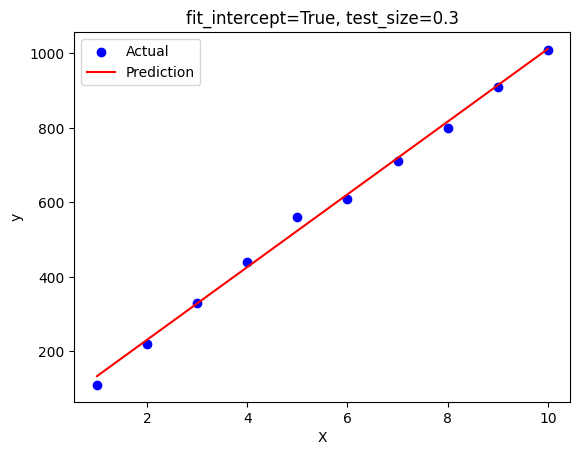


🔍 test_size = 0.3, fit_intercept = False
✅ R² on Training Set: 0.9921
✅ R² on Test Set    : 0.998
Intercept: 0.0
Coefficient: [102.76515152]


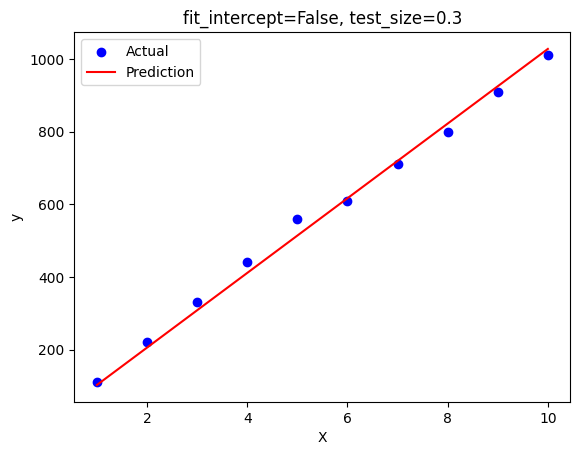


🔍 test_size = 0.2, fit_intercept = True
✅ R² on Training Set: 0.9954
✅ R² on Test Set    : 0.9996
Intercept: 34.999999999999886
Coefficient: [97.5]


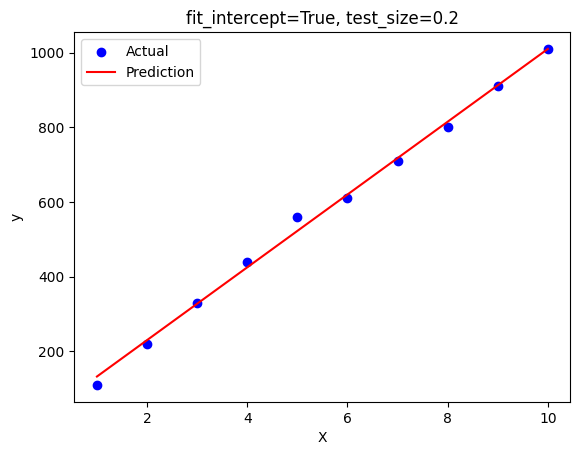


🔍 test_size = 0.5, fit_intercept = False
✅ R² on Training Set: 0.9868
✅ R² on Test Set    : 0.9966
Intercept: 0.0
Coefficient: [103.61809045]


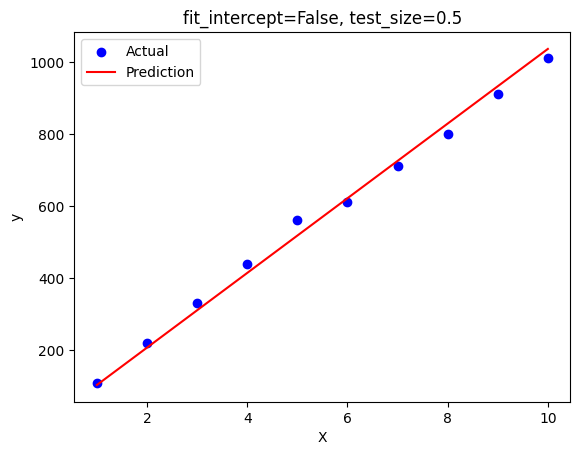

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Sample synthetic data
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [110, 220, 330, 440, 560, 610, 710, 800, 910, 1010]  # roughly linear

# Function to test various conditions
def run_experiment(test_size=0.3, fit_intercept=True):
    print(f"\n🔍 test_size = {test_size}, fit_intercept = {fit_intercept}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create & train model
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train, y_train)

    # Predict & evaluate
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    print("✅ R² on Training Set:", round(train_r2, 4))
    print("✅ R² on Test Set    :", round(test_r2, 4))
    print("Intercept:", model.intercept_)
    print("Coefficient:", model.coef_)

    # Optional: visualize
    plt.scatter(X, y, color='blue', label='Actual')
    plt.plot(X, model.predict(X), color='red', label='Prediction')
    plt.title(f'fit_intercept={fit_intercept}, test_size={test_size}')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Example 1
run_experiment(test_size=0.3, fit_intercept=True)

# Example 2
run_experiment(test_size=0.3, fit_intercept=False)

# Example 3
run_experiment(test_size=0.2, fit_intercept=True)

# Example 4
run_experiment(test_size=0.5, fit_intercept=False)
